In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style='dark')

In [2]:
df = pd.read_csv('../data/Most-Recent-Cohorts-Institution.csv', na_values=['NULL', 'PrivacySuppressed'], low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Columns: 3214 entries, UNITID to BBRR4_PP_NOMALE_DISCHARGE
dtypes: float64(2509), int64(14), object(691)
memory usage: 160.4+ MB


count      6024.000000
mean      10902.551461
std        8946.779713
min           0.000000
25%        4884.250000
50%        9435.500000
75%       14253.750000
max      191794.000000
Name: TUITFTE, dtype: float64

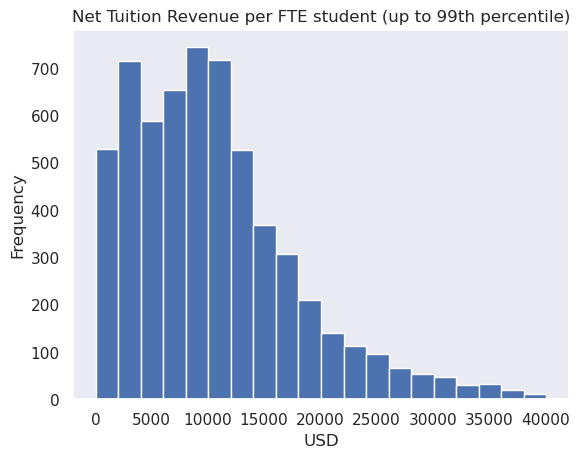

In [3]:
tuit_99_ptile = np.percentile(df.TUITFTE.dropna(), 99)
ax = df[df.TUITFTE<=tuit_99_ptile].TUITFTE.plot.hist(
    bins=20, 
    title='Net Tuition Revenue per FTE student (up to 99th percentile)')
ax.set_xlabel('USD');
df.TUITFTE.describe()
# print(df.loc[df.TUITFTE>40000, 'INSTNM'].to_numpy())

count      6024.000000
mean       8759.862716
std       13306.209710
min           0.000000
25%        3854.500000
50%        6377.500000
75%        9894.500000
max      598759.000000
Name: INEXPFTE, dtype: float64

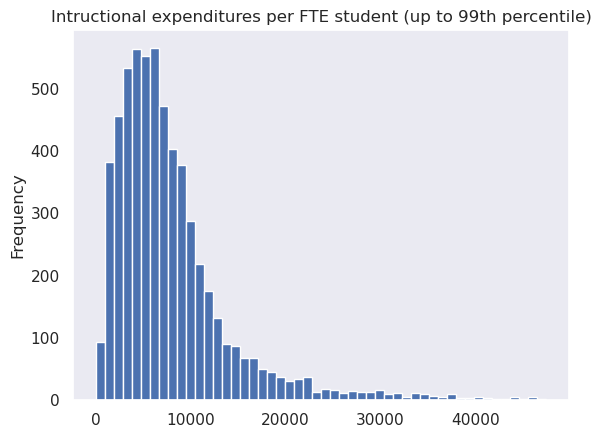

In [4]:
expend_99_ptile = np.percentile(df.INEXPFTE.dropna(), 99)
df[df.INEXPFTE<=expend_99_ptile].INEXPFTE.plot.hist(bins=50, title='Intructional expenditures per FTE student (up to 99th percentile)')
df.INEXPFTE.describe()
# df.loc[df.INEXPFTE>150000, 'INSTNM']
# expend_99_ptile

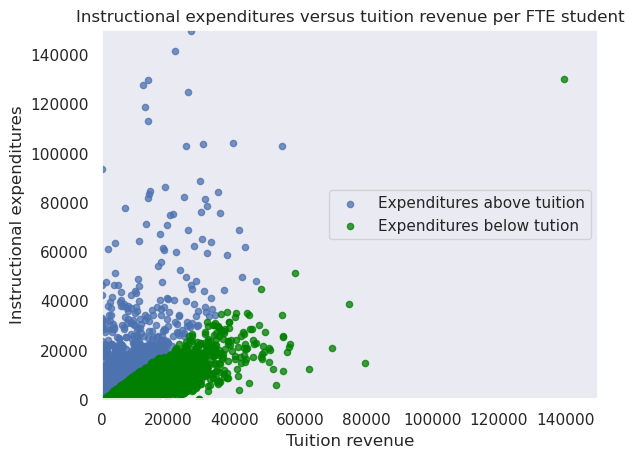

In [5]:
ax = df[df.INEXPFTE>df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    label='Expenditures above tuition',
    title='Instructional expenditures versus tuition revenue per FTE student'
)
df[df.INEXPFTE<=df.TUITFTE].plot.scatter(
    x='TUITFTE', 
    y='INEXPFTE', 
    alpha=0.75, 
    ax=ax, 
    c='green', 
    label='Expenditures below tution',
    xlabel='Tuition revenue',
    ylabel='Instructional expenditures'
)
# ax.set_xscale('function', functions=(lambda values: values/1000, lambda values: values*1000))
ax.legend()
# plt.plot(np.arange(200_000), np.arange(200_000), c='black');
ax.set_xlim(0,150_000)
ax.set_ylim(0,150_000);

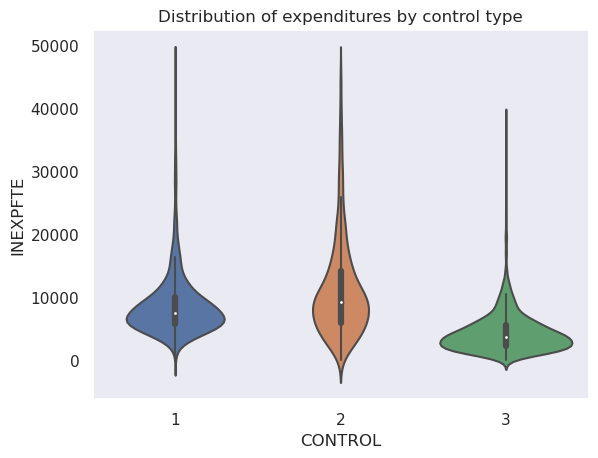

In [11]:
ax = sns.violinplot(df[df.INEXPFTE<=expend_99_ptile], x='CONTROL', y='INEXPFTE')
ax.set_title('Distribution of expenditures by control type');

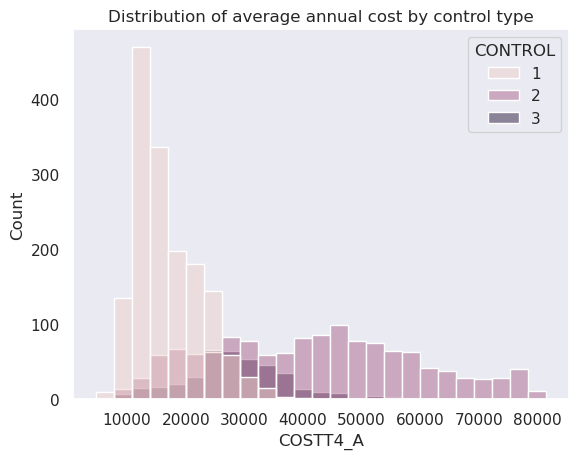

In [16]:
ax = sns.histplot(df, x='COSTT4_A', hue='CONTROL')
# df.COSTT4_A.plot.hist(title='Distribution of average annual cost', c=df.CONTROL);
ax.set_title('Distribution of average annual cost by control type');

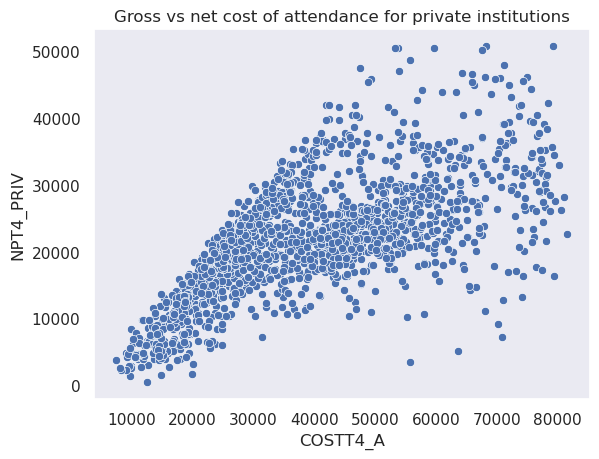

In [18]:
ax = sns.scatterplot(df, x='COSTT4_A', y='NPT4_PRIV')
ax.set_title('Gross vs net cost of attendance for private institutions');

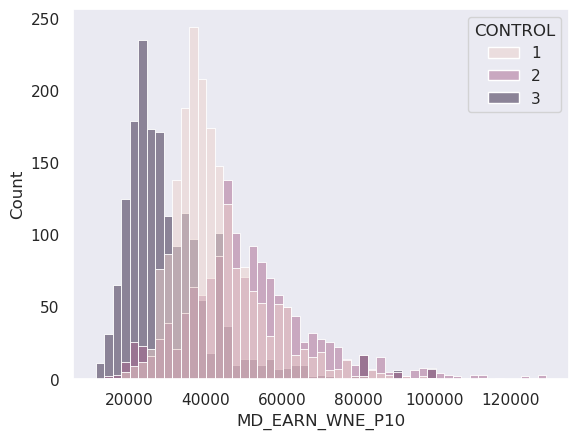

In [21]:
ax = sns.histplot(df, x='MD_EARN_WNE_P10', hue='CONTROL')
ax.set_title('Median earnings 10 years after entry, by control')
# df.MD_EARN_WNE_P10.hist()

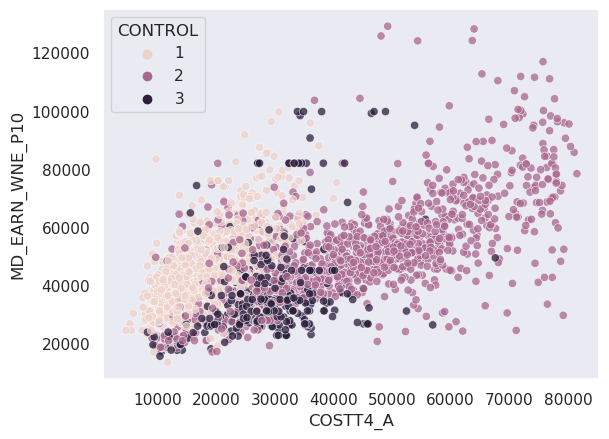

In [25]:
ax = sns.scatterplot(df, x='COSTT4_A', y='MD_EARN_WNE_P10', hue='CONTROL', alpha=0.75)
